# KANO Model Product Analysis with Python

The Kano Model (pronounced “kah-no”) is an approach to prioritizing features on a product roadmap based on the degree to which they are likely to satisfy customers. Product teams can weigh a high-satisfaction feature against its costs to implement, to determine whether or not adding it to the roadmap is a strategically sound decision.

The Kano Model is one of many prioritization frameworks designed to help product teams prioritize initiatives. Kano can help teams determine which features will satisfy and even delight customers. Product managers often use the Kano Model to prioritize potential new features by grouping them into categories. These feature categories can range from those that could disappoint customers, to those likely to satisfy or even delight customers.

To understand more about Kano Model, please refer to https://www.productplan.com/glossary/kano-model/ for more information.

## Import Data

In [1]:
import pandas as pd
data=pd.read_excel('data.xlsx',header=0)
data.drop(index=0)
segment=list(range(0,len(data.columns)+1,2))

num=len(data.columns)/2
store=[]
for x in range(1,len(segment)):
    df=data.iloc[:,segment[x-1]:segment[x]].copy()
    store.append(df)

## Calculate the SI (Satisfied Influence) and DSI (Dissatisfied Influence) Values

SI represents the degree about how the product feature can statisfy customers

DSI represents the degree about how the product feature can disstatisfy customers

In [2]:
eval_matrix=pd.DataFrame({'喜歡':['Q','R','R','R','R'],'應該的':['A','I','I','I','R'],
             '無所謂':['A','I','I','I','R'],'能忍受':['A','I','I','I','R'],
             '不喜歡':['O','M','M','M','Q']})
eval_matrix.index=['喜歡','應該的','無所謂','能忍受','不喜歡']

In [3]:
result=pd.DataFrame()
for x in range(0,len(store)):
    Kano_score=[]
    for y in range(0,len(list(store[x].iloc[:,0]))):
        Kano_score.append(eval_matrix.loc[store[x].iloc[y,0],store[x].iloc[y,1]])
    pos='Feature '+str(x+1)+"-1"  
    neg='Feature '+str(x+1)+"-2" 
    col_name3='Feature '+str(x+1)+"-Result" 
    result[pos]=store[x].iloc[:,0].copy()
    result[neg]=store[x].iloc[:,1].copy()
    result[col_name3]=Kano_score

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create function to calculate SI
def SI(A: int,O: int,M: int,I: int)->float:
    return float((A+O) / (A+O+M+I))

def DSI(A: int,O: int,M: int,I: int)->float:
    return float((O+M) / (A+O+M+I) * -1)

# Create function to visualize the result
def showGraph(dsi: float, si:float,title:str,x: int, y: int, n:int)->str:
    ax=plt.axes()
    ax.scatter(si,dsi)
    ax.set(xlim=[0,1],ylim=[-1,0],xlabel='SI',ylabel='DSI',xticks=np.arange(0,1,0.1),yticks=np.arange(-1,0,0.1)) # set the ranges of x-axis y-axis
    ax.set_title(title,size=15)
    ax.grid(True)
    # Make the central two lines thick
    gridlines = ax.yaxis.get_gridlines()
    gridlines[5].set_color('k')
    gridlines[5].set_linewidth(2.5)
    gridlines = ax.xaxis.get_gridlines()
    gridlines[5].set_color('k')
    gridlines[5].set_linewidth(2.5)
    plt.fill([0.3,0.3,0.7,0.7],[-0.7,-0.3,-0.3,-0.7],alpha=0.5) # Creat the central rectangle area
    plt.savefig('./figures/'+title+'.jpg')
    plt.show()

## Output and Visualize the Results

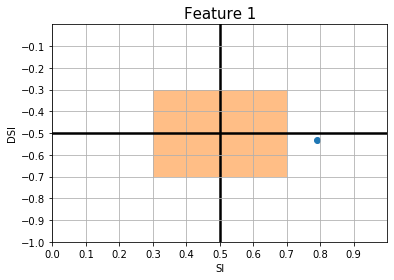

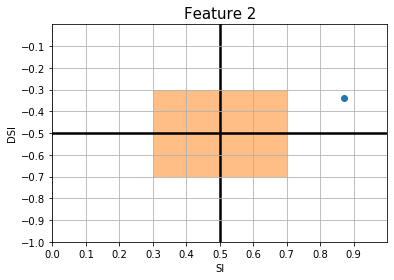

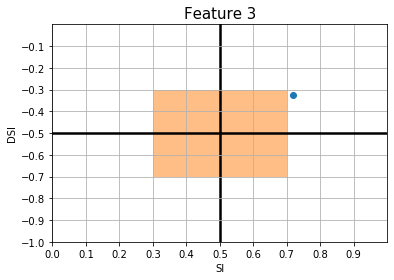

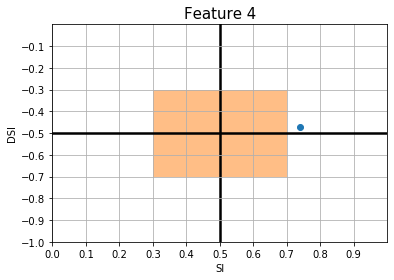

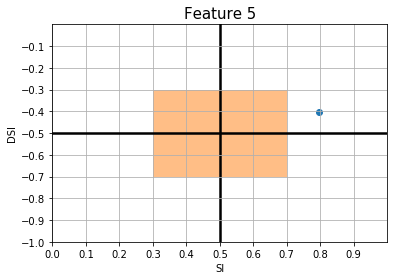

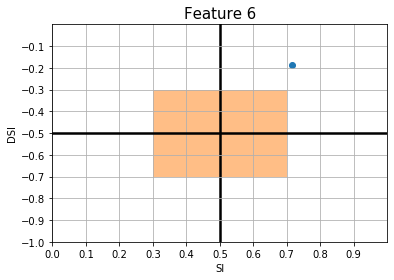

In [5]:
import collections
import os
os.makedirs('figures',exist_ok=True)
pos=list(range(2,len(result.columns),3))

count=collections.Counter(result.iloc[:,2])
df=pd.DataFrame.from_dict(count,orient='index')
df.columns=['Score']

si=SI(df.loc['A','Score'],df.loc['O','Score'],df.loc['M','Score'],df.loc['I','Score'])
dsi=DSI(df.loc['A','Score'],df.loc['O','Score'],df.loc['M','Score'],df.loc['I','Score'])
df['SI']=np.nan
df.iloc[0,1]=si
df['DSI']=np.nan
df.iloc[0,2]=dsi
df.to_excel('KANO_Model_Analysis.xlsx',sheet_name='Feature 1')
showGraph(dsi,si,'Feature 1',len(pos)/2,2,1)

with pd.ExcelWriter('KANO_Model_Analysis.xlsx', engine="openpyxl",mode='a') as writer:
    for x in range(1,len(pos)):
        count=collections.Counter(result.iloc[:,pos[x]])
        df=pd.DataFrame.from_dict(count,orient='index')
        df.columns=['Score']
        si=SI(df.loc['A','Score'],df.loc['O','Score'],df.loc['M','Score'],df.loc['I','Score'])
        dsi=DSI(df.loc['A','Score'],df.loc['O','Score'],df.loc['M','Score'],df.loc['I','Score'])
        df['SI']=np.nan
        df.iloc[0,1]=si
        df['DSI']=np.nan
        df.iloc[0,2]=dsi
        df.to_excel(writer,sheet_name='Feature '+str(x+1))
        showGraph(dsi,si,'Feature '+str(x+1),len(pos)/2,2,x+1)

## Conclusion

In the figures above, if the dot is located in the colored area, we can conclude that this feature is neutral, meaning that the appearance of this feature in the product would significantly influence customers' satisfaction. 

On the other hand, if the dot is positioned in the first dimension of the graph, we can conclude that this feautre is desired by customers and that its presence can significantly satisfy our customers. 

Moreover, if the dot is located in the fourth dimension, we can specify that this feature is necessary and basic for customers. The disapperance of this feature would seriously dissatisfy customers.

Therefore, we can conclude that Feature 1 is necessary to appear in the product, while Feature 2, 3, 4, 5, and 6 are desired by our customers.

## References

創始者 狩野紀昭介紹 

http://mx.nthu.edu.tw/~ctsu/QRC/studyQ/Master/Kano_index.htm
    
狩野分析實作

https://medium.com/%E4%B8%8D%E6%82%B6%E7%87%92%E5%B7%A5%E4%BD%9C%E5%9D%8A/50-%E7%8B%A9%E9%87%8E%E5%88%86%E6%9E%90-7c48913900cb

滿意度模型

http://www.hansshih.com/post/85896168800/kano-%E6%BB%BF%E6%84%8F%E5%BA%A6%E6%A8%A1%E5%9E%8B